# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = output_file_directory + "/dataframes_for_input/"

# II] Data download

In [5]:
%%time
# DL data ATG7 isoform expression
df = pandas.read_csv(path+'df_ATG7_transcripts.csv', sep = ',', index_col=0)
print(df.shape)
df.head()

(4310, 11)
Wall time: 23 ms


,Primary_Site,ATG7_1,ATG7_2,ATG7_3,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,2.774154,1.572901,0.665603,5.840747,1.975023,0.586231,8.402002,69.516142,23.506581,6.977278
GTEX-1117F-0526-SM-5EGHJ,Blood Vessel,2.449581,2.125261,0.000000,4.462576,3.362819,0.000000,7.825395,57.026848,42.973152,0.000000
GTEX-1117F-0626-SM-5N9CS,Blood Vessel,3.147029,0.341564,0.000000,7.858296,0.267129,0.000000,8.125425,96.712428,3.287572,0.000000
GTEX-1117F-1326-SM-5EGHH,Adipose Tissue,1.676243,1.749657,0.000000,2.195947,2.362787,0.000000,4.558734,48.170106,51.829894,0.000000
GTEX-1117F-2226-SM-5N9CH,Ovary,2.923147,0.000000,0.000000,6.584989,0.000000,0.000000,6.584989,100.000000,0.000000,0.000000


# III] ATG7 expression per tissues

In [6]:
path2 = output_file_directory + 'ATG7/TCGA_GTEX/all_tissues/figs_ATG7_characterisation/'

## A. Percentage of expression for each ATG7 isoform 

In [14]:
#heatmap data preparation
##select columns
df_sampletype = df[['Primary_Site','ATG7_1tpm','ATG7_2tpm',
                    'ATG7_1perc','ATG7_2perc','ATG7_3perc']]

##Column rename
df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                'ATG7_1tpm': 'tpm ATG7(1)',
                                                'ATG7_2tpm': 'tpm ATG7(2)',
                                                'ATG7_1perc' : "% ATG7(1)",
                                                'ATG7_2perc' : "% ATG7(2)",
                                                'ATG7_3perc' : "% ATG7(3)"})

##Groupby to have merge of all the primary site 
df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)
df_sampletype = df_sampletype.round(2)

# Add column to check 1+2+3=100%
df_sampletype['total%'] = df_sampletype['% ATG7(1)'] + df_sampletype['% ATG7(2)'] + df_sampletype['% ATG7(3)']
df_sampletype

df_sampletype.head()

,tpm ATG7(1),tpm ATG7(2),% ATG7(1),% ATG7(2),% ATG7(3),total%
Primary Site,,,,,,
Adipose Tissue,7.06,1.73,79.62,18.39,1.99,100.00
Adrenal Gland,6.77,1.41,82.92,15.55,1.52,99.99
Blood,2.99,4.46,37.31,54.50,8.19,100.00
Blood Vessel,8.39,1.14,87.16,11.54,1.30,100.00
Brain,6.57,0.34,95.02,4.09,0.90,100.01


In [9]:
print(df_sampletype['% ATG7(1)'].mean())
print(df_sampletype['% ATG7(2)'].mean())

83.66227272727274
14.517272727272728


In [10]:
HeatMap_df_sampletype = df_sampletype[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]

### 1. For all tissues

In [11]:
# From wide to long dataframe
df_perc_all = HeatMap_df_sampletype.melt()
df_perc_all['variable'] = df_perc_all['variable'].str.split(' ', expand=True)[1]
df_perc_all

,variable,value
0,ATG7(1),79.62
1,ATG7(1),82.92
2,ATG7(1),37.31
3,ATG7(1),87.16
4,ATG7(1),95.02
...,...,...
61,ATG7(3),0.87
62,ATG7(3),4.03
63,ATG7(3),0.68
64,ATG7(3),1.49


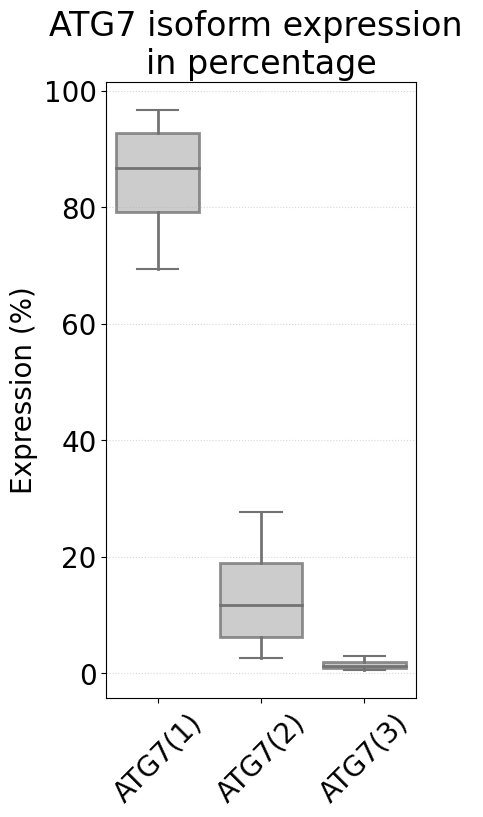

In [12]:
#graph
plt.figure(figsize=(4, 8))
seaborn.boxplot(x="variable", y="value", color = 'silver',
                data = df_perc_all, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.title('ATG7 isoform expression \nin percentage')
plt.ylabel('Expression (%)')
plt.xlabel('')
plt.xticks(rotation = 45)
#save
name = 'boxplot_percentage'
plt.savefig(path2+name+'_article.svg')

### 2. For each tissue

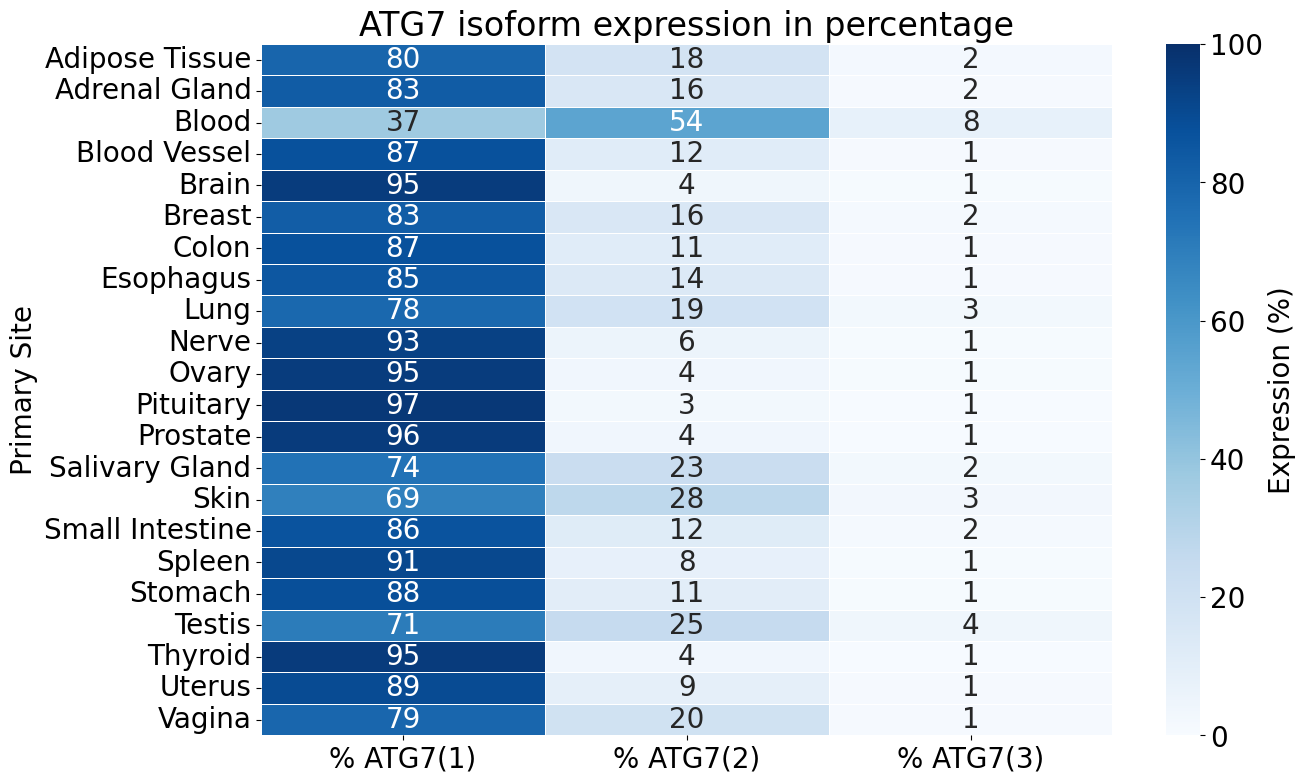

In [13]:
#heatmap percentage
plt.subplots()
plt.tight_layout()

seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="Blues", linewidths=.5,
                vmin = 0, vmax = 100,
                xticklabels=True, yticklabels=True, fmt='.0f',
                cbar_kws={'label': 'Expression (%)'})
plt.title('ATG7 isoform expression in percentage')

name = 'heatmap_organs_article'
plt.savefig(path2+name+'_article.svg')